<a href="https://colab.research.google.com/github/Omshreerh/Indegenous_News-Sentiment-Analysis/blob/main/News_Sentiment_Analysis_on_kw_'India'.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install newsapi-python
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50 kB 2.5 MB/s 
     |████████████████████████████████| 62 kB 1.5 MB/s 
     |████████████████████████████████| 112 kB 27.6 MB/s 
     |████████████████████████████████| 110 kB 59.2 MB/s 
     |████████████████████████████████| 4.0 MB 60.1 MB/s 
     |████████████████████████████████| 128 kB 64.0 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
   

In [1]:
import nltk
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd

In [2]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [6]:
#We need the NewsApiClient library from newsapi
from newsapi import NewsApiClient
from datetime import date, timedelta, datetime

In [7]:
#We need SentimentIntensityAnalyser for sentiment analysis and sentiment score.
from nltk.sentiment.vader import SentimentIntensityAnalyzer
model = SentimentIntensityAnalyzer()

In [8]:
#Setting max columnwidth so that all entries are seen upon running the program
pd.set_option('display.max_colwidth',1000)

In [9]:
#This the the api key generated on the websit newsapi.org that is different for each user
key= '8732a13819724f58b4ab035370351393'

In [10]:
#We are looking to extract all articles that have the keyword 'INDIA' in them
newsapi = NewsApiClient(api_key= key)
keywrd = 'India'
my_date = date.today() - timedelta(days=1) 
articles = newsapi.get_everything(q = keywrd,from_param = my_date.isoformat(),to = (my_date + timedelta(days = 1)).isoformat(),language="en",sort_by="relevancy",page_size = 100)

In [11]:
articles

{'status': 'ok',
 'totalResults': 967,
 'articles': [{'source': {'id': 'reuters', 'name': 'Reuters'},
   'author': None,
   'title': "Rahul Gandhi's cross-India march reaches capital city Delhi - Reuters India",
   'description': 'A cross-country march led by Indian opposition leader Rahul Gandhi reached the capital New Delhi on Saturday, hoping to regain some of the popularity it lost to the ruling Hindu-nationalist party.',
   'url': 'https://www.reuters.com/world/india/rahul-gandhis-cross-india-march-reaches-capital-city-delhi-2022-12-24/',
   'urlToImage': 'https://www.reuters.com/resizer/KA_hqhHKYoJuFuwjFBACRDgsfu4=/1200x628/smart/filters:quality(80)/cloudfront-us-east-2.images.arcpublishing.com/reuters/GOGLVOKR55PLPPVI3C3AMEOTSA.jpg',
   'publishedAt': '2022-12-24T09:39:00Z',
   'content': 'NEW DELHI, Dec 24 (Reuters) - A cross-country march led by Indian opposition leader Rahul Gandhi reached the capital New Delhi on Saturday, hoping to regain some of the popularity it lost to t

In [13]:
Sentence = ['India claimed four wickets in Saturdays morning session to reduce Bangladesh to 71-4 on day three of the second test in Mirpur on Saturday.Zakir Hasan was batting on 37 with Bangladesh still 16 behind having conceded a first-innings lead of 87 in the second inning',\
           'Wow, how things change.',\
           'Find the top hits and fails of bollywood fashion',\
           'Former DHS Secretary Janet Napolitano spoke with Yahoo Finance about comprehensive immigration reform.']

for phrase in Sentence:
  print(f'{phrase}')
  print(model.polarity_scores(phrase))

India claimed four wickets in Saturdays morning session to reduce Bangladesh to 71-4 on day three of the second test in Mirpur on Saturday.Zakir Hasan was batting on 37 with Bangladesh still 16 behind having conceded a first-innings lead of 87 in the second inning
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Wow, how things change.
{'neg': 0.0, 'neu': 0.441, 'pos': 0.559, 'compound': 0.5859}
Find the top hits and fails of bollywood fashion
{'neg': 0.241, 'neu': 0.603, 'pos': 0.155, 'compound': -0.25}
Former DHS Secretary Janet Napolitano spoke with Yahoo Finance about comprehensive immigration reform.
{'neg': 0.0, 'neu': 0.857, 'pos': 0.143, 'compound': 0.25}


In [15]:
def get_sentiments(keywrd, startd, sources_list = None, show_all_articles = False):
   
  newsapi = NewsApiClient(api_key= key)
  if type(startd) == str:
    my_date = datetime.strptime(startd,'%d-%b-%Y')
  else:
    my_date = startd
  if sources_list:
    articles = newsapi.get_everything(q = keywrd,
                                      from_param = my_date.isoformat(), 
                                      to = (my_date + timedelta(days = 1)).isoformat(),
                                      language="en",
                                      sources = ",".join(sources_list),
                                      sort_by="relevancy",
                                      page_size = 100)
  else:
     articles = newsapi.get_everything(q = keywrd,
                                       from_param = my_date.isoformat(), 
                                       to = (my_date + timedelta(days = 1)).isoformat(),
                                       language="en",
                                       sort_by="relevancy",
                                       page_size = 100)
  article_content = ''

  date_sentiments = {}
  date_sentiments_list = []
  setting = set()
  
  for article in articles['articles']:
    if str(article['title']) in setting:
      continue
    else:
      setting.add(str(article['title']))
      article_content = str(article['title']) + '. ' + str(article['description'])      
      sentiment = model.polarity_scores(article_content)['compound']
      date_sentiments.setdefault(my_date, []).append(sentiment)
      date_sentiments_list.append((sentiment, article['url'],article['title'],article['description']))

  date_sentiments_l = sorted(date_sentiments_list, key=lambda tup: tup[0], reverse = True)   
  sent_list = list(date_sentiments.values())[0]

  return pd.DataFrame(date_sentiments_list, columns=['Sentiment','URL','Title','Description'])
     

    Sentiment  \
0      0.7845   
1      0.2023   
2      0.0000   
3      0.1531   
4      0.4588   
..        ...   
95     0.7003   
96     0.0000   
97     0.2500   
98     0.2023   
99    -0.5574   

                                                                                                                                                     URL  \
0                                             https://www.reuters.com/world/india/rahul-gandhis-cross-india-march-reaches-capital-city-delhi-2022-12-24/   
1                                         https://www.reuters.com/lifestyle/sports/india-tighten-grip-mirpur-after-bangladesh-top-order-wilt-2022-12-24/   
2                                                                                                https://www.bbc.co.uk/news/science-environment-64002977   
3                             https://www.tribuneindia.com/news/nation/centre-makes-rtpcr-test-mandatory-for-arrivals-from-china-4-more-countries-464116   
4              

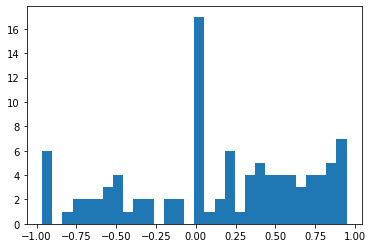

In [16]:
my_date = date.today() - timedelta(days=1) 

return_articles = get_sentiments(keywrd= 'India' ,startd = my_date, sources_list = None, show_all_articles= True)
return_articles.Sentiment.hist(bins=30, grid=False)
print(return_articles)

In [17]:
return_articles["Date"] = my_date

In [19]:
return_articles.sort_values(by='Sentiment', ascending=False)[['Sentiment','URL', 'Description','Title']].head(50)

,Sentiment,URL,Description,Title
14,0.9466,https://www.androidcentral.com/phones/poco-f4-gt-long-term-review,"POCO has a lot to offer with the F4 GT. The gaming phone has a vibrant screen, powerful hardware, and undercuts Xiaomi and Samsung devices by a considerable margin.",POCO F4 GT long-term review: This gaming phone is still a terrific value
70,0.9460,https://sports.ndtv.com/bangladesh-vs-india-2022-23/updated-world-test-championship-points-table-india-retain-second-spot-after-series-win-over-bangladesh-3636666,"<ol><li>Updated World Test Championship Points Table: India Retain Second Spot After Series Win Over Banglad.. NDTV Sports\r\n</li><li>Updated ICC World Test Championship Points Table After India vs Bangladesh 2nd Test, WTC Table Cricket Addictor\r\n</li><li>In…",Updated World Test Championship Points Table: India Retain Second Spot After Series Win Over Banglad.. - NDTV Sports
51,0.9313,https://www.icc-cricket.com/news/2992246,"<ol><li>India strengthen World Test Championship Final chances with series sweep over Bangladesh ICC Cricket\r\n</li><li>Updated ICC World Test Championship Points Table After India vs Bangladesh 2nd Test, WTC Table Cricket Addictor\r\n</li><li>Updated World Te…",India strengthen World Test Championship Final chances with series sweep over Bangladesh - ICC Cricket
65,0.9217,https://zeenews.india.com/cricket/ind-vs-ban-2nd-test-day-3-mohammed-siraj-says-this-about-team-indias-chances-of-winning-test-match-check-2553280.html,"<ol><li>We don`t need...: Mohammed Siraj says THIS about Team India`s chances of winning Test match - Check Zee News\r\n</li><li>Cricbuzz Chatter: 2nd Test, Day 3: Can #India still win the match vs #Bangladesh? Cricbuzz\r\n</li><li>PHOTOS: Mirpur Test set for a…",We don`t need...: Mohammed Siraj says THIS about Team India`s chances of winning Test match - Check - Zee News
59,0.9100,https://cricketaddictor.com/india-tour-of-bangladesh-2022/updated-icc-world-test-championship-points-table-after-india-vs-bangladesh-2nd-test-wtc-table/,"<ol><li>Updated ICC World Test Championship Points Table After India vs Bangladesh 2nd Test, WTC Table Cricket Addictor\r\n</li><li>World Test Championship Points Table update: India maintains 2nd spot after 2-0 win v Bangladesh; Final qualification scenarios …","Updated ICC World Test Championship Points Table After India vs Bangladesh 2nd Test, WTC Table - Cricket Addictor"
10,0.8860,https://www.bbc.co.uk/sport/cricket/64089695,India win a nailbiter in Dhaka to beat Bangladesh and secure a 2-0 series win.,India hold nerve to beat Bangladesh in thriller
20,0.8860,https://www.theguardian.com/lifeandstyle/2022/dec/24/expert-master-secrets-scrabble-sudoku-jenga-and-more,"From an 11-year old Scrabble prodigy to the UK jigsaw champion, we asked master gamers and puzzlers to reveal their secretsThe first time I speak to George Scholey this October, he is on the train to the UK Rubik’s Cube championships in Coventry. The 20-year-…","‘Dig deep and think as hard as possible’ – the secrets of success in Scrabble, Sudoku, Jenga and more"
57,0.8689,https://www.abc.net.au/news/2022-12-24/india-replaces-covid-era-free-food-program-with-cheaper-scheme/101807694,India will end its COVID-19 era free food program on December 31 and replace it with a cheaper scheme that will save the government nearly $20 billion over the coming 12 months.,"India replaces COVID-era free food program with cheaper, paid scheme"
29,0.8689,https://indianexpress.com/article/opinion/columns/gs-bajpai-and-ankit-kaushik-write-president-murmu-comments-affordable-justice-legal-fees-8342155/,"Affordable justice, much like affordable healthcare and housing, is a bedrock of modern democracies which place a premium on the welfare of their citizens.",President Murmu’s comments on affordable justice: Let’s begin by bringing down legal fees
60,0.8665,https://www.breitbart.com/asia/2022/12/23/indians-celebrate-christmas-despite-threat-of-hindu-extremists/,"Festive Christmas celebrations were h

In [20]:
return_articles.sort_values(by='Sentiment', ascending=False)[['Sentiment','Title']].head(50)

,Sentiment,Title
14,0.9466,POCO F4 GT long-term review: This gaming phone is still a terrific value
70,0.9460,Updated World Test Championship Points Table: India Retain Second Spot After Series Win Over Banglad.. - NDTV Sports
51,0.9313,India strengthen World Test Championship Final chances with series sweep over Bangladesh - ICC Cricket
65,0.9217,We don`t need...: Mohammed Siraj says THIS about Team India`s chances of winning Test match - Check - Zee News
59,0.9100,"Updated ICC World Test Championship Points Table After India vs Bangladesh 2nd Test, WTC Table - Cricket Addictor"
10,0.8860,India hold nerve to beat Bangladesh in thriller
20,0.8860,"‘Dig deep and think as hard as possible’ – the secrets of success in Scrabble, Sudoku, Jenga and more"
57,0.8689,"India replaces COVID-era free food program with cheaper, paid scheme"
29,0.8689,President Murmu’s comments on affordable justice: Let’s begin by bringing down legal fees
60,0.8665,Indians Celebrate Christmas Despite Threat of Hindu Extremists
